# Libraries

In [38]:
import pandas as pd
import numpy as np
import re
import os

# DataViz
import matplotlib.pyplot as plt
import plotly.express as px

# Word Tokenizer
from nltk.tokenize import word_tokenize

# Wordcloud
from wordcloud import WordCloud

# Data

In [2]:
#name of the albuns
album_name = []

#each album will be appended to a list
zombie_attack = []
chemical_invasion = []
the_morning_after = []
alien = []
the_meaning_of_life = []
stone_cold_sober = []
two_faced = []
the_tankard = []
disco_destroyer = []
kings_of_beer = []
b_day = []
beast_of_bourbon = []
the_beauty_beer = []
thirst = []
volume_14 = []
girl_cerveza = []
rib = []

In [3]:
# getting each album name and apeeding it to album_name
for album in os.listdir('tankard-lyrics'):
    album_name.append(album)
    
album_name

['1. Zombie Attack (1986).txt',
 '10. Kings Of Beer (2000).txt',
 '11. B-Day (2002).txt',
 '12. Beast Of Bourbon (2004).txt',
 '13. The Beauty And The Beer (2006).txt',
 '14. Thirst (2008).txt',
 '15. Volume 14 (2010).txt',
 '16. A Girl Called Cerveza (2012).txt',
 '17. Rest In Beer (2014).txt',
 '2. Chemical Invasion (1987).txt',
 '3. The Morning After (1988).txt',
 '4. Alien (1989).txt',
 '5. The Meaning Of Life (1990).txt',
 '6. Stone Cold Sober (1992).txt',
 '7. Two-Faced (1994).txt',
 '8. The Tankard (1995).txt',
 '9. Disco Destroyer (1998).txt']

In [4]:
def album_to_list(album_name):
    with open('tankard-lyrics/' + album_name) as album:
        full_album = album.readlines()
        album = []
        for lines in full_album:
            lines = lines.lower()
            album.append(lines)
        return album

In [5]:
zombie_attack = album_to_list(album_name[0])
chemical_invasion = album_to_list(album_name[1])
the_morning_after = album_to_list(album_name[2])
alien = album_to_list(album_name[3])
the_meaning_of_life = album_to_list(album_name[4])
stone_cold_sober = album_to_list(album_name[5])
two_faced = album_to_list(album_name[6])
the_tankard = album_to_list(album_name[7])
disco_destroyer = album_to_list(album_name[8])
kings_of_beer = album_to_list(album_name[9])
b_day = album_to_list(album_name[10])
beast_of_bourbon = album_to_list(album_name[11])
the_beauty_beer = album_to_list(album_name[12])
thirst = album_to_list(album_name[13])
volume_14 = album_to_list(album_name[14])
girl_cerveza = album_to_list(album_name[15])
rib = album_to_list(album_name[16])

In [6]:
#list for all albuns
tankard = [zombie_attack, chemical_invasion, the_morning_after, alien, the_meaning_of_life, stone_cold_sober, two_faced,
          the_tankard, disco_destroyer, kings_of_beer, b_day, beast_of_bourbon, the_beauty_beer, thirst, volume_14,
          girl_cerveza, rib]

In [7]:
number_of_albuns = len(tankard)
number_of_albuns

17

In [8]:
all = []

for album in tankard:
    for line in album:
        line = re.sub(r'\W+|[0-9]', ' ',line)
        all.append(line)
    
all


[' zombie attack      ',
 ' ',
 '  zombie attack ',
 ' ',
 'i m just hanging around tonight just watching films ',
 'i am on the zombie trip and brutal things i like ',
 ' ',
 'zombie attack ',
 ' ',
 'the film i saw is over now and i leave my home ',
 'brutal zombies are shouting so hard is it real or not ',
 ' ',
 'zombie attack ',
 ' ',
 'i wake up this was a dream i drink my beer ',
 'but then i see a zombie killin i know i must die ',
 ' ',
 ' ',
 '  poison ',
 ' ',
 'she s got a look that knocking you down ',
 'her husband is so angry kicks her in the teeth ',
 ' ',
 'he want to kill he wants to poison ',
 'poison he s a maniac ',
 'poison poison ',
 ' ',
 'fuckin little worms are creeping in her face ',
 'the man gets crazy and he must kick her down ',
 ' ',
 'smash the axe into her fuckin ugly face ',
 'the blood is running out of her eyes ',
 ' ',
 ' ',
 '  acid death ',
 ' ',
 'an insane murderer is comin to you ',
 'you are cryin horrible to god ',
 'but satan laughs and doe

In [9]:
all_words = ''.join(all)
all_words

' zombie attack         zombie attack  i m just hanging around tonight just watching films i am on the zombie trip and brutal things i like  zombie attack  the film i saw is over now and i leave my home brutal zombies are shouting so hard is it real or not  zombie attack  i wake up this was a dream i drink my beer but then i see a zombie killin i know i must die     poison  she s got a look that knocking you down her husband is so angry kicks her in the teeth  he want to kill he wants to poison poison he s a maniac poison poison  fuckin little worms are creeping in her face the man gets crazy and he must kick her down  smash the axe into her fuckin ugly face the blood is running out of her eyes     acid death  an insane murderer is comin to you you are cryin horrible to god but satan laughs and doesn t help you are gonna die in hell tonight fight for the nation underground dyin and killin so hard tonight we break up the wall of sound the end is near we will fight he is so cruel and lik

# Tokenize

In [10]:
words_tokenized = word_tokenize(all_words)

In [11]:
words_tokenized.count('whiskey')

9

# Word Cloud

(-0.5, 999.5, 599.5, -0.5)

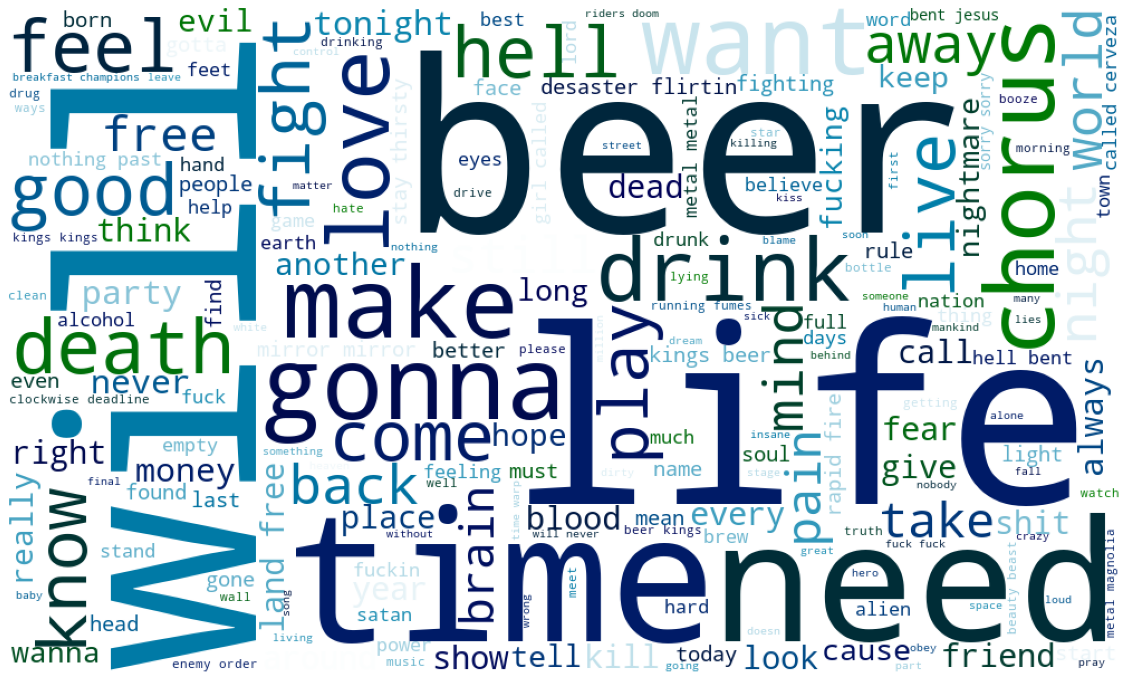

In [12]:
worldcloud_img = WordCloud(min_word_length=4, width=1000, height=600,
                          background_color='white', colormap='ocean').generate(all_words)
plt.figure(figsize=(20,20))
plt.imshow(worldcloud_img)
plt.axis('off')
#plt.savefig('wordcloud_tankard.png')

In [13]:
tankard_frequences = WordCloud().process_text(all_words)
tankard_frequences = pd.DataFrame.from_dict(tankard_frequences, orient='index')
tankard_frequences = tankard_frequences.rename(columns={0:'Frequence'})
tankard_frequences = tankard_frequences.sort_values('Frequence', ascending=False)
tankard_frequences = tankard_frequences[3:]
tankard_frequences = tankard_frequences.reset_index()
tankard_frequences.head()

,Frequence
will,156
beer,147
ll,135
don t,132
life,118
...,...
frontier,1
ultimate,1
orbit,1
unrestrained,1


In [100]:
fig = px.treemap(tankard_frequences[1:40], 
                 path=[px.Constant("all"), 'index'], 
                 values='Frequence', title='Tankard Lyrics - Tree Map Plot',
                width=1000, height=700)


fig.update_traces(root_color="white")
fig.update_traces(textposition='middle center', selector=dict(type='treemap'))



fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), font_size=20)
fig.write_html("tree_map_all.html")
fig.show()

In [15]:
tankard_frequences.count()

Frequence    4609
dtype: int64

In [16]:
tankard_frequences.sum()

Frequence    19871
dtype: int64